In [22]:
# importing utility functions
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

module_path = os.path.abspath(os.path.join(os.pardir,'src'))
if module_path not in sys.path:
    sys.path.append(module_path)
    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
path = '../raw_data/household/csv_household_demographics.csv'
household_demo = pd.read_csv(path)

In [24]:
household_demo.columns


Index(['household_id', 'district_id', 'vdcmun_id', 'ward_id',
       'gender_household_head', 'age_household_head', 'caste_household',
       'education_level_household_head', 'income_level_household',
       'size_household', 'is_bank_account_present_in_household'],
      dtype='object')

In [35]:
household_demo.describe()

,household_id,district_id,vdcmun_id,ward_id,age_household_head,size_household,is_bank_account_present_in_household
count,7.473650e+05,747365.000000,747365.000000,747365.000000,747363.000000,747363.000000,747137.000000
mean,2.607625e+13,25.769283,2582.814776,258286.901431,46.626690,4.921438,0.196684
std,5.739377e+12,5.744361,574.853109,57485.403626,15.072183,2.473748,0.397492
min,1.201010e+13,12.000000,1201.000000,120101.000000,10.000000,1.000000,0.000000
25%,2.222050e+13,22.000000,2204.000000,220405.000000,34.000000,3.000000,0.000000
50%,2.459040e+13,24.000000,2409.000000,240911.000000,46.000000,5.000000,0.000000
75%,3.035070e+13,30.000000,3010.000000,301003.000000,57.000000,6.000000,0.000000
max,3.667090e+13,36.000000,3611.000000,361108.000000,122.000000,40.000000,1.000000


In [25]:
household_demo['income_level_household'].value_counts()


Rs. 10 thousand            409102
Rs. 10-20 thousand         231688
Rs. 20-30 thousand          76124
Rs. 30-50 thousand          21943
Rs. 50 thousand or more      8280
Name: income_level_household, dtype: int64

In [26]:
household_demo.shape


(747365, 11)

In [36]:
round(household_demo['age_household_head'].value_counts(normalize=True)*100,5)

44.0     2.71207
46.0     2.46319
32.0     2.45824
47.0     2.45704
34.0     2.40753
          ...   
114.0    0.00013
110.0    0.00013
119.0    0.00013
112.0    0.00013
122.0    0.00013
Name: age_household_head, Length: 107, dtype: float64

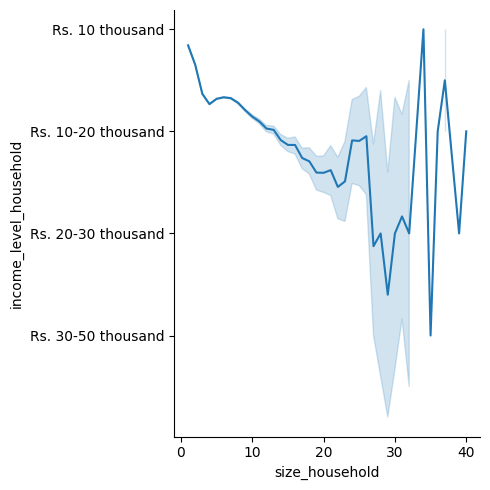

In [38]:
sns.relplot(data=household_demo, x="size_household", y="income_level_household", kind="line")


<AxesSubplot:>

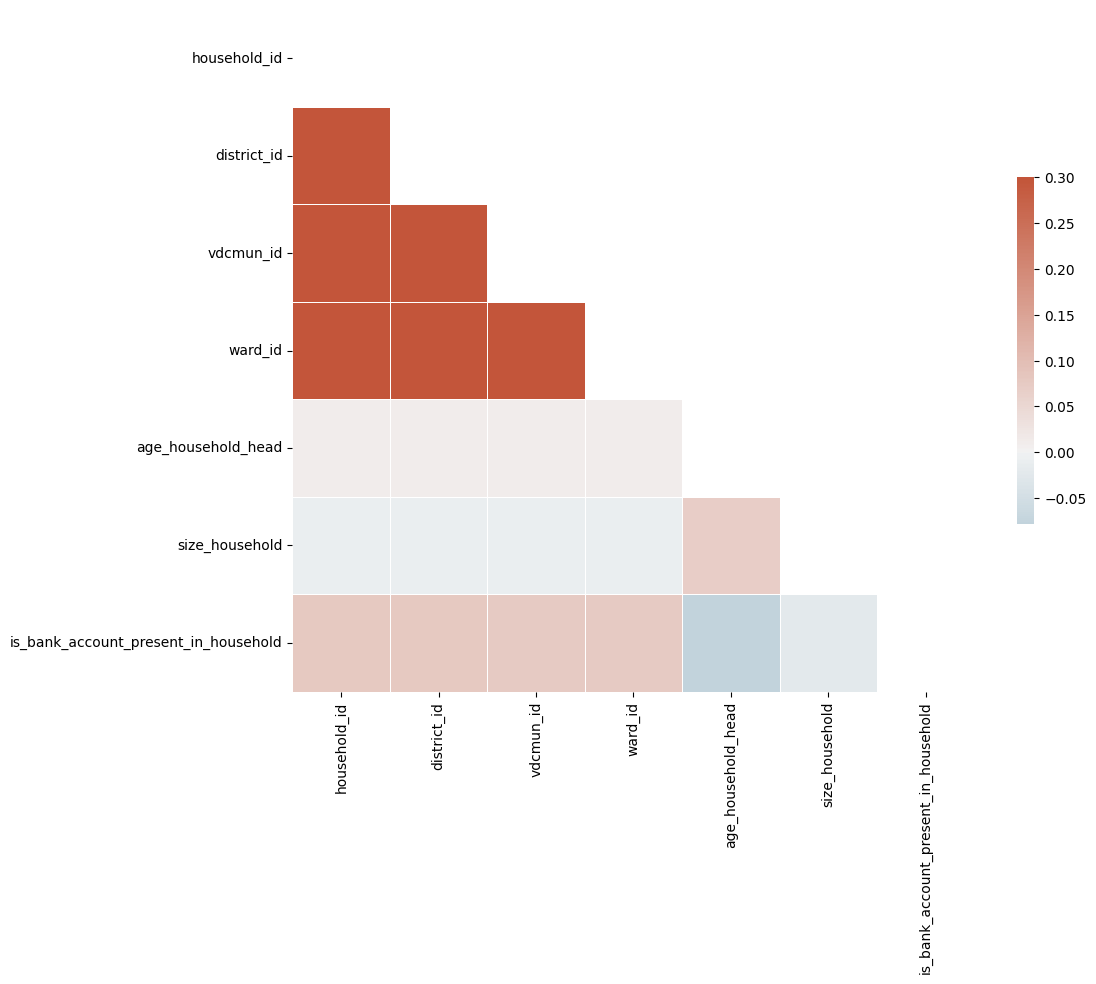

In [27]:
# Compute the correlation matric
corr = household_demo.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

#Generate a custom divering colormap
cmap = sns.diverging_palette(230, 20, as_cmap = True)

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:
other_dataset = pd.DataFrame()
other_dataset = household_demo[['income_level_household', 'household_id']]


In [10]:
other_dataset.head()


,income_level_household,household_id
0,Rs. 10 thousand,12010100001101
1,Rs. 10 thousand,12010100002101
2,Rs. 10 thousand,12010100003101
3,Rs. 10 thousand,12010100004101
4,Rs. 10 thousand,12010100005101


In [11]:
path = '../raw_data/household/csv_household_earthquake_impact.csv'
hh_post_eq  = pd.read_csv(path)

In [12]:
hh_post_eq.columns


Index(['household_id', 'district_id', 'vdcmun_id', 'ward_id',
       'shelter_condition_household_post_eq', 'residence_household_pre_eq',
       'residence_household_post_eq', 'household_eq_id_type',
       'has_death_occurred_last_12_months', 'count_death_last_12_months',
       'has_injury_loss_occurred_last_12_months',
       'count_injury_loss_last_12_months',
       'has_education_drop_occurred_last_12_months',
       'count_education_drop_last_12_months',
       'has_pregnancy_treatment_drop_occurred_last_12_months',
       'count_pregnancy_treatment_drop_last_12_months',
       'has_vaccination_drop_occurred_last_12_months',
       'count_vaccination_drop_last_12_months',
       'has_occupation_change_occurred_last_12_months',
       'count_occupation_change_last_12_months',
       'residence_district_household_head_pre_eq',
       'residence_district_household_head_post_eq', 'is_recipient_rahat_15k',
       'is_recipient_rahat_10k', 'is_recipient_rahat_200k',
       'is_recipie

In [13]:
pd.set_option('display.max_columns', None )
hh_post_eq.head()

,household_id,district_id,vdcmun_id,ward_id,shelter_condition_household_post_eq,residence_household_pre_eq,residence_household_post_eq,household_eq_id_type,has_death_occurred_last_12_months,count_death_last_12_months,has_injury_loss_occurred_last_12_months,count_injury_loss_last_12_months,has_education_drop_occurred_last_12_months,count_education_drop_last_12_months,has_pregnancy_treatment_drop_occurred_last_12_months,count_pregnancy_treatment_drop_last_12_months,has_vaccination_drop_occurred_last_12_months,count_vaccination_drop_last_12_months,has_occupation_change_occurred_last_12_months,count_occupation_change_last_12_months,residence_district_household_head_pre_eq,residence_district_household_head_post_eq,is_recipient_rahat_15k,is_recipient_rahat_10k,is_recipient_rahat_200k,is_recipient_rahat_social_security_3k,is_recipient_rahat_none,is_ineligible_rahat
0,12010100001101,12,1207,120703,Staying in their own house,This VDC/Municipality,This VDC/Municipality,ID Card for Total Destruction,0.0,NaN,0.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1,1,0,0,0,0
1,12010100002101,12,1207,120703,Staying in their own house,This VDC/Municipality,This VDC/Municipality,Have not received ID Card,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0
2,12010100003101,12,1207,120703,Staying in their own house,This VDC/Municipality,This VDC/Municipality,Have not received ID Card,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0
3,12010100004101,12,1207,120703,Staying in their own house,This VDC/Municipality,This VDC/Municipality,Have not received ID Card,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0
4,12010100005101,12,1207,120703,Staying in their own house,This VDC/Municipality,This VDC/Municipality,Have not received ID Card,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0


In [14]:
path = '../raw_data/household/csv_household_resources.csv'
hh_resources  = pd.read_csv(path)

In [15]:
hh_resources.columns


Index(['household_id', 'district_id', 'vdcmun_id', 'ward_id',
       'source_water_pre_eq', 'source_water_post_eq',
       'source_cooking_fuel_pre_eq', 'source_cooking_fuel_post_eq',
       'source_light_pre_eq', 'source_light_post_eq', 'type_toilet_pre_eq',
       'type_toilet_post_eq', 'has_asset_land_pre_eq', 'has_asset_tv_pre_eq',
       'has_asset_cable_pre_eq', 'has_asset_computer_pre_eq',
       'has_asset_internet_pre_eq', 'has_asset_telephone_pre_eq',
       'has_asset_mobile_phone_pre_eq', 'has_asset_fridge_pre_eq',
       'has_asset_motorcycle_pre_eq',
       'has_asset_four_wheeler_family_use_pre_eq',
       'has_asset_four_wheeler_commercial_use_pre_eq', 'has_asset_none_pre_eq',
       'has_asset_land_post_eq', 'has_asset_tv_post_eq',
       'has_asset_cable_post_eq', 'has_asset_computer_post_eq',
       'has_asset_internet_post_eq', 'has_asset_telephone_post_eq',
       'has_asset_mobile_phone_post_eq', 'has_asset_fridge_post_eq',
       'has_asset_motorcycle_post_eq',
 

In [16]:
hh_resources.head()


,household_id,district_id,vdcmun_id,ward_id,source_water_pre_eq,source_water_post_eq,source_cooking_fuel_pre_eq,source_cooking_fuel_post_eq,source_light_pre_eq,source_light_post_eq,type_toilet_pre_eq,type_toilet_post_eq,has_asset_land_pre_eq,has_asset_tv_pre_eq,has_asset_cable_pre_eq,has_asset_computer_pre_eq,has_asset_internet_pre_eq,has_asset_telephone_pre_eq,has_asset_mobile_phone_pre_eq,has_asset_fridge_pre_eq,has_asset_motorcycle_pre_eq,has_asset_four_wheeler_family_use_pre_eq,has_asset_four_wheeler_commercial_use_pre_eq,has_asset_none_pre_eq,has_asset_land_post_eq,has_asset_tv_post_eq,has_asset_cable_post_eq,has_asset_computer_post_eq,has_asset_internet_post_eq,has_asset_telephone_post_eq,has_asset_mobile_phone_post_eq,has_asset_fridge_post_eq,has_asset_motorcycle_post_eq,has_asset_four_wheeler_family_use_post_eq,has_asset_four_wheeler_commercial_post_eq,has_asset_none_post_eq
0,12010100001101,12,1207,120703,Pipeline,Pipeline,Wood,Wood,Electricity,Electricity,Simple,Simple,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,12010100002101,12,1207,120703,Pipeline,Pipeline,Wood,Wood,Electricity,Electricity,Simple,Simple,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,12010100003101,12,1207,120703,Pipeline,Pipeline,Wood,Wood,Electricity,Electricity,Simple,Simple,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,12010100004101,12,1207,120703,Pipeline,Pipeline,Wood,Wood,Electricity,Electricity,Simple,Simple,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,12010100005101,12,1207,120703,Pipeline,Pipeline,Wood,Wood,Electricity,Electricity,Simple,Flush-out lavatory with septic tank,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [17]:
path = '../raw_data/individual/csv_individual_demographics.csv'
indiv_demo = pd.read_csv(path)


In [18]:
indiv_demo.head()


,individual_id,district_id,vdcmun_id,ward_id,gender_individual,age_individual,presence_in_household,disability_individual,has_registered_birth,education_level_individual,marital_status_individual
0,12010100001101001,12,1207,120703,Male,31,Mostly Present,No,NaN,Illiterate,Married
1,12010100001101002,12,1207,120703,Female,58,Mostly Present,No,NaN,Illiterate,Married
2,12010100001101003,12,1207,120703,Male,15,Mostly Present,No,NaN,Class 7,Not Married
3,12010100002101001,12,1207,120703,Female,62,Mostly Present,No,NaN,Illiterate,Widow/Widower
4,12010100002101002,12,1207,120703,Male,23,Not present-Abroad,No,NaN,Class 6,Married


In [19]:
indiv_demo.shape


(3677133, 11)

In [20]:
demo_df = indiv_demo[['individual_id', 'district_id', 'vdcmun_id', 'ward_id','gender_individual', 'age_individual']]


In [21]:
demo_df.shape


(3677133, 6)

In [ ]:
indiv_ss = pd.read_csv('../data/extracted/eq_data/csv_individual_social_security.csv')
